In [3]:
import pandas as pd
from io import StringIO
csv_data = """A, B,C D,
1.0,2.0,3.0,4.0,
5.0,6.0,0.7,8.0,
9.0,0.0,11.0,12.0"""

In [4]:
df = pd.read_csv(StringIO(csv_data))
print (df)

       A     B   C D  Unnamed: 3
1.0  2.0   3.0   4.0         NaN
5.0  6.0   0.7   8.0         NaN
9.0  0.0  11.0  12.0         NaN


In [6]:
# using the isnull method to return a dataframe with boolean values
# that indicate wheater a cell contains a numeric value (false) or if
# data is missing(True), using the sum method, we can then return the number
# of missing values per column as follows.

df.isnull().sum()

A             0
 B            0
C D           0
Unnamed: 3    3
dtype: int64

In [7]:
df.keys()

Index(['A', ' B', 'C D', 'Unnamed: 3'], dtype='object')

In [8]:
df['Unnamed: 3'] = [3.0,4.0,6.0]

In [9]:
df

,A,B,C D,Unnamed: 3
1.0,2.0,3.0,4.0,3.0
5.0,6.0,0.7,8.0,4.0
9.0,0.0,11.0,12.0,6.0


In [15]:
print (df.loc(4))

In [16]:
# eliminating samples or features with missing values
df.dropna()

,A,B,C D,Unnamed: 3
1.0,2.0,3.0,4.0,3.0
5.0,6.0,0.7,8.0,4.0
9.0,0.0,11.0,12.0,6.0


In [17]:
# similarly we can drop columns that have at least one NaN in any row by setting
# the axis argument to 1
df.dropna(axis = 1)

,A,B,C D,Unnamed: 3
1.0,2.0,3.0,4.0,3.0
5.0,6.0,0.7,8.0,4.0
9.0,0.0,11.0,12.0,6.0


In [20]:
# to drop rows when all columns are NaN
df.dropna(how = 'all')

# drop row that have not at least 4 non-NaN values
df.dropna(thresh = 4)

# only drop rows where NaN appear in specific columns (here:'c')
#df.dropna(subset = ['C'])

,A,B,C D,Unnamed: 3
1.0,2.0,3.0,4.0,3.0
5.0,6.0,0.7,8.0,4.0
9.0,0.0,11.0,12.0,6.0


In [21]:
# imputing missing values
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
print (imputed_data)

[[  2.    3.    4.    3. ]
 [  6.    0.7   8.    4. ]
 [  0.   11.   12.    6. ]]


In [22]:
# the fit method is used to learn parameters from the training data, and
# the transform method uses those parameters to transform the data.

# handling categorical variables

In [23]:
df = pd.DataFrame([
    ['green', 'M', 10.0, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']
])

In [24]:
df.columns = ['color', 'size', 'price', 'classlabel']

print (df)

   color size  price classlabel
0  green    M   10.0     class1
1    red    L   13.5     class2
2   blue   XL   15.3     class1


 # mapping ordinal features

In [25]:
size_mapping = {'XL':3, 'L':2,'M':1}


In [26]:
df['size'] = df['size'].map(size_mapping)

In [27]:
df

,color,size,price,classlabel
0,green,1,10.0,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


# Encoding class labels

In [28]:
import numpy as np
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}

In [29]:
class_mapping

{'class1': 0, 'class2': 1}

In [30]:
df['classlabel'] = df['classlabel'].map(class_mapping)

In [31]:
df

,color,size,price,classlabel
0,green,1,10.0,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [32]:
class_mapping.items()

dict_items([('class1', 0), ('class2', 1)])

In [33]:
size_mapping.items()

dict_items([('XL', 3), ('L', 2), ('M', 1)])

In [34]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
print (y)

[0 1 0]


In [35]:
class_le.inverse_transform(y)

array([0, 1, 0], dtype=int64)

In [36]:
df

,color,size,price,classlabel
0,green,1,10.0,0
1,red,2,13.5,1
2,blue,3,15.3,0


# performing one-hot encoding on nominal features

In [37]:
x = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
x[:, 0] = color_le.fit_transform(x[:,0])
print (x)

[[1 1 10.0]
 [2 2 13.5]
 [0 3 15.3]]


In [43]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = [0])
ohe.fit_transform(x).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10. ],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

# using the get_dummies method implemented in pandas

In [44]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.0,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


# spliting data into train and test set

In [45]:
from sklearn.cross_validation import train_test_split

C:\Users\ACER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [49]:
from sklearn.datasets import load_iris

In [53]:
iris = load_iris()
x,y = iris.data, iris.target


In [56]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

# Bringing features onto the same scale

In [58]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train_norm = mms.fit_transform(x_train)
x_test_norm = mms.transform(x_test)

In [59]:
# similar to MinMaxScaler, scikit-learn also implements a class for
# standardization

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.transform(x_test)

# selecting meaniful features

In [60]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty = 'l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
lr = LogisticRegression(penalty = 'l1', C = 0.1)
lr.fit(x_train_std, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
print("Training accuracy: ", lr.score(x_train_std, y_train))
print("Test accuracy: ", lr.score(x_test_std, y_test))

Training accuracy:  0.819047619048
Test accuracy:  0.711111111111


In [63]:
lr.intercept_

array([-0.40054185, -0.42762577, -0.24901363])

In [64]:
lr.coef_

array([[ 0.        ,  0.21720825, -1.76363189,  0.        ],
       [ 0.        , -0.46520901,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.50473536]])

# regularization path plot

In [65]:
import sklearn

C:\Users\ACER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


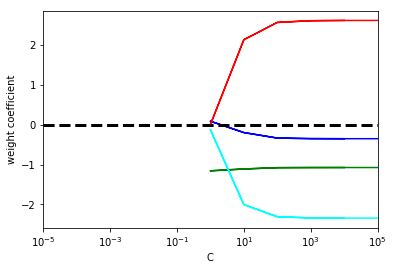

In [75]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red','cyan','magenta','yellow','black',
         'pink','lightgreen','lightblue','gray','indigo','orange']
weights, params = [],[]
for c in np.arange(-4,6):
    lr = LogisticRegression(penalty = 'l1',C = pow(10,np.abs(c)), random_state = 0)
    lr.fit(x_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**np.abs(c))
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:,column], color = color)

plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
plt.xlim(10**(-5), 10**5)
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc = 'upper left')
ax.legend(loc = 'upper center', bbox_to_anchor = (1,38,1.03), ncols = 1, fancybox = True)
plt.show()

# sequential feature selection algorithm

In [76]:
# unfortunately, the SBS algorithm is not implemeted in scikit-learn
# implementing this in python from scratch we have.

from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring = accuracy_score,
                 test_size = 0.25, random_state = 1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, x, y):
        x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = self.test_size,
                                                           random_state = self.random_state)
        dim = x_train.shape[1]
        self.indice = tuple(range(dim))
        self.subsets = [self.indices_]
        score = self.calc_score(x_train, y_train,x_test,y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            score = []
            subsets = []
            
            for p in combinations(self.indices_, r = dim-1):
                score = self._calc_score(x_train, y_train, x_test,y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score = self.scores_[-1]
        
        return self
    
    def transfrom(self, x):
        return x[:, self.indices_]
    
    
    def _cal_score(self, x_train, y_train, x_test, y_test, indices):
        self.estimator.fit(x_train[:, indices], y_train)
        y_pred = self.estimator.predict(x_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
    
    
    

In [77]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors = 2)
sbs = SBS(knn, k_features= 1)
sbs.fit(x_train_std,y_train)

AttributeError: 'SBS' object has no attribute 'indices_'

# Assessing feature importance with random forests

In [79]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = iris.data
forest = RandomForestClassifier(n_estimators = 10000, random_state = 0, n_jobs = -1)
forest.fit(x_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print ("%2d) %-*s %f" %(f+1,30,feat_labels(f), importances(indices[f])))

TypeError: 'numpy.ndarray' object is not callable

In [ ]:
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1], importances[indices], color = 'lightblue',align = 'center'))
plt.xticks(range(x_train.shape[1], feat_labels, rotation = 90))
plt.xlim(-1,x_train.shape[1])
plt.tight_layout()
plt.show(0)